# Integración Numérica - Aplicación en imágenes

Ya hemos comprobado la utilidad de los métodos de interpolación y de los métodos de detección de cruces por cero para encontrar parámetros de las imágenes que nos son de utilidad, como las partes faltantes y los bordes. ¿Qué pasa cuándo se integra una imagen?

** Actividad 1**

Para la actividad  sigue los pasos:

1. Selecciona una imagen a color de tu preferencia
2. Para cada uno de los canales, encuentra la integral numérica por filas con al menos dos métodos compuestos. Recuerda que el valor de la función evaluada en un punto es equivalente al valor de intensidad del píxel en ese mismo punto. 
3. Cambia los límites de integración (toma segmentos de 5,10,15 y 20 píxeles). Los límites de integración son las x, o sea el índice del píxel. El valor de intensidad es f(x) en ese píxel.
4. Junta los canales nuevamente para que obtengas una nueva imagen.
5. ¿Qué imagen observas para cada opción de segmentos?. ¿Cuál es la diferencia entre las imágenes?

In [1]:
#espacio para la solución de la actividad 1
import scipy as sp #librería de señales
import numpy as np #librería numérica
import matplotlib.pyplot as plt #librería de graficación
import cv2
from sympy import *
import scipy.ndimage as nd
import math
import copy
nuevaImagen = []
img= cv2.imread('picachu.png',1) # cargamos una imagen de muestra que se encuentra en la librería scipy
Blue = img[:,:,0]
Green = img[:,:,1]
Red =  img[:,:,2]

plt.imshow(img) #visualización de la imagen
plt.show()
cv2.imshow('imagen',img)
cv2.waitKey(0) & 0xFF 
cv2.destroyAllWindows()

<Figure size 640x480 with 1 Axes>

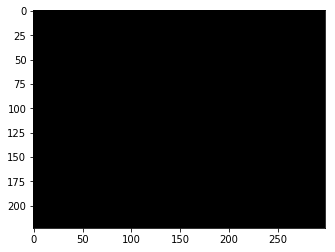

In [2]:
nuevaImagen = np.zeros((img.shape[0],img.shape[1],3), np.uint8) #crea una imagen negra
plt.imshow(nuevaImagen) #visualización de la imagen
plt.show()

In [4]:
def metodoLagrange(datos):
    pixel = 0
    grado = len(datos)
    x = Symbol('x')
    for k in range(grado):
            productoria = 1
            for i in range(grado):
                if (i != k) and i != (x-1):
                    productoria *= ((x) - (i+1))/((k+1) - (i+1))
            productoria = productoria * datos[k]        
            pixel += productoria

    return pixel


In [5]:
def trapecioCompuesto(funcion,punto_inicial,punto_final,M):
    fun = vars(math)
    h = (punto_final - punto_inicial)/M
    suma = eval(funcion,fun,{'x':punto_inicial})
    
    for i in range(0,M-1):
        punto_inicial = punto_inicial + h
        suma = suma + 2 * eval(funcion,fun,{'x':punto_inicial})
    suma = suma + eval(funcion,fun,{'x':punto_final})
    I= h *(suma/2)
    return I  

In [9]:
#espacios para la implementación de los métodos
def metodoTrapecioCompuesto(segmento, a, b, M):
    fun = vars(math)
    integral = 0 
    h = (b-a)/M
    
    for i in range(0,M-1):
        
        y0 = segmento[ int(a + i*h) ]
        y1 = segmento[ int(a + (i+1) * h) ]
        integral += (h/2)*(y0 + y1)
        
    return int(integral)

In [6]:
#con la funcion
tSegmento = 5
for i in range(Blue.shape[0]):
    for j in range(0,Blue.shape[1], tSegmento):
        #print("j:" , j)
        
        if ((j+tSegmento) <= Blue.shape[1]):
            #Azul
            segmento = Blue[i, j:j+tSegmento]
            funcion = (metodoLagrange(segmento))
            integral = trapecioCompuesto(str(funcion), 0, len(segmento), 3)
            valorAsignar = int(integral/len(segmento))
            #print(segmento)
            #print(valorAsignar)
            nuevaImagen[i,j:j+tSegmento,0] = valorAsignar
            
            #Verde
            segmento = Green[i, j:j+tSegmento]
            funcion = (metodoLagrange(segmento))
            integral = trapecioCompuesto(str(funcion), 0, len(segmento), 3)
            valorAsignar = int(integral/len(segmento))
            #print(segmento)
            #print(valorAsignar)
            nuevaImagen[i,j:j+tSegmento,1] = valorAsignar
            
            #Rojo
            segmento = Red[i, j:j+tSegmento]
            funcion = (metodoLagrange(segmento))
            integral = trapecioCompuesto(str(funcion), 0, len(segmento), 3)
            valorAsignar = int(integral/len(segmento))
            #print(segmento)
            #print(valorAsignar)
            nuevaImagen[i,j:j+tSegmento,2] = valorAsignar
            


In [10]:
#con el segmento 
tSegmento = 5
for i in range(Blue.shape[0]):
    for j in range(0,Blue.shape[1], tSegmento):
        #print("j:" , j)
        
        if ((j+tSegmento) <= Blue.shape[1]):
            #Azul
            segmento = Blue[i, j:j+tSegmento]
            
            integral = metodoTrapecioCompuesto(segmento, 0, len(segmento), 3)
            valorAsignar = int(integral/len(segmento))
            #print(segmento)
            #print(valorAsignar)
            nuevaImagen[i,j:j+tSegmento,0] = valorAsignar
            
            #Verde
            segmento = Green[i, j:j+tSegmento]
           
            integral = metodoTrapecioCompuesto(segmento, 0, len(segmento), 3)
            valorAsignar = int(integral/len(segmento))
            #print(segmento)
            #print(valorAsignar)
            nuevaImagen[i,j:j+tSegmento,1] = valorAsignar
            
            #Rojo
            segmento = Red[i, j:j+tSegmento]
           
            integral = metodoTrapecioCompuesto(segmento, 0, len(segmento), 3)
            valorAsignar = int(integral/len(segmento))
            #print(segmento)
            #print(valorAsignar)
            nuevaImagen[i,j:j+tSegmento,2] = valorAsignar
            

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


In [15]:
cv2.imshow('nuevaImagen',nuevaImagen)
cv2.waitKey(0) & 0xFF 
cv2.destroyAllWindows()